# Side chain orientation

Angle/category distribution per KLIFS position.

## Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from pathlib import Path
import pickle
import sys

import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../..')
from kissim.auxiliary import KlifsMoleculeLoader, PdbChainLoader, get_klifs_residues_mol2topdb
from kissim.encoding import SideChainOrientationFeature

_ColormakerRegistry()

In [4]:
pd.set_option('display.max_rows', 1000)

## IO paths

In [5]:
path_to_kinsim = Path('.') / '..' / '..'
path_to_data = path_to_kinsim / 'examples' / 'data'
path_to_results = path_to_kinsim / 'examples' / 'results' / 'side_chain_orientation'

metadata_path = path_to_data / 'postprocessed' / 'klifs_metadata_postprocessed.csv'
sco_wo_pcb_path = path_to_results / 'side_chain_orientations_wo_pcb.p'
sco_path = path_to_results / 'side_chain_orientations.p'

## Load metadata

In [6]:
klifs_metadata = pd.read_csv(metadata_path, index_col=0)
klifs_metadata.head()

,metadata_index,kinase,family,groups,pdb_id,chain,alternate_model,species,ligand_orthosteric_name,ligand_orthosteric_pdb_id,...,ac_helix,rmsd1,rmsd2,qualityscore,pocket,resolution,missing_residues,missing_atoms,full_ifp,code
0,2886,AAK1,NAK,Other,4wsq,B,A,Human,K-252A,KSA,...,in,0.777,2.125,8.6,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.95,0,14,0000000000000010000001000000000000000000000000...,HUMAN/AAK1/4wsq_chainB_altA
1,10043,AAK1,NAK,Other,5l4q,A,A,Human,"~{N}-[5-(4-cyanophenyl)-1~{H}-pyrrolo[2,3-b]py...",LKB,...,in,0.780,2.137,9.7,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.97,0,3,0000000000000010000000000000000000000000000000...,HUMAN/AAK1/5l4q_chainA_altA
2,7046,AAK1,NAK,Other,5te0,A,-,Human,methyl (3Z)-3-{[(4-{methyl[(4-methylpiperazin-...,XIN,...,in,0.776,2.120,8.8,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.90,0,12,1000101000000010000001000000000000000000000000...,HUMAN/AAK1/5te0_chainA
3,843,ABL1,Abl,TK,2f4j,A,-,Human,CYCLOPROPANECARBOXYLIC ACID {4-[4-(4-METHYL-PI...,VX6,...,in,0.779,2.128,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.91,0,0,0000000000000010000001000000000000000000000000...,HUMAN/ABL1/2f4j_chainA
4,815,ABL1,Abl,TK,2g1t,A,-,Human,-,-,...,out,0.825,2.154,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.80,0,0,NaN,HUMAN/ABL1/2g1t_chainA


## Side chain orientation

In [7]:
def get_sco_data(sco_path):
    
    with open(sco_path, 'rb') as f:
        sco_data = pickle.load(f)

    sco_list = []

    for key, value in sco_data.data.items():

        sco = value.features_verbose
        sco['molecule_code'] = key
        sco_list.append(sco)

    sco_df = pd.concat(sco_list, sort=False)
    sco_df.reset_index(inplace=True, drop=True)
    
    return sco_df

In [8]:
def plot_sco_boxplot(sco_df):
    
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.suptitle('Bla')
    
    return sco_df.boxplot(
        column='vertex_angle',
        by='klifs_id', 
        ax=ax
    )

In [9]:
def plot_sco_barplot(sco_df):
    
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.suptitle('')
    
    p = sco_df.groupby(['klifs_id', 'sco']).size().unstack().plot(
        kind='bar', 
        stacked=True, 
        ax=ax, 
        color=['steelblue', 'lightgrey', 'skyblue'],
        legend=['a', 'b', 'c'],
        ylim=[0, 5000]
    )
    
    p.set_ylabel('Number of KLIFS structures')
    p.set_xlabel('KLIFS position')
    p.set_title('Side chain orientation towards pocket centroid')
    
    legend = plt.legend()
    legend.get_texts()[0].set_text('0.0 - Inwards (angle [0, 45])')
    legend.get_texts()[1].set_text('1.0 - Intermediate (angle ]45, 90])')
    legend.get_texts()[2].set_text('2.0 - Outwards (angle ]90, 180])')

    return p

In [10]:
def plot_residue_sequence_occurrency(klifs_metadata, residue_name):

    sequence = pd.DataFrame([list(i) for i in klifs_metadata.pocket], columns=range(1,86))

    fig, ax = plt.subplots(figsize=(20,4))
    plt.suptitle('')

    return sequence.apply(lambda x: x==residue_name).apply(lambda x: sum(x)).plot(kind='bar', ax=ax)

### Data

In [11]:
sco_wo_pcb = get_sco_data(sco_wo_pcb_path)
sco = get_sco_data(sco_path)

### Plots for SCO without pCB

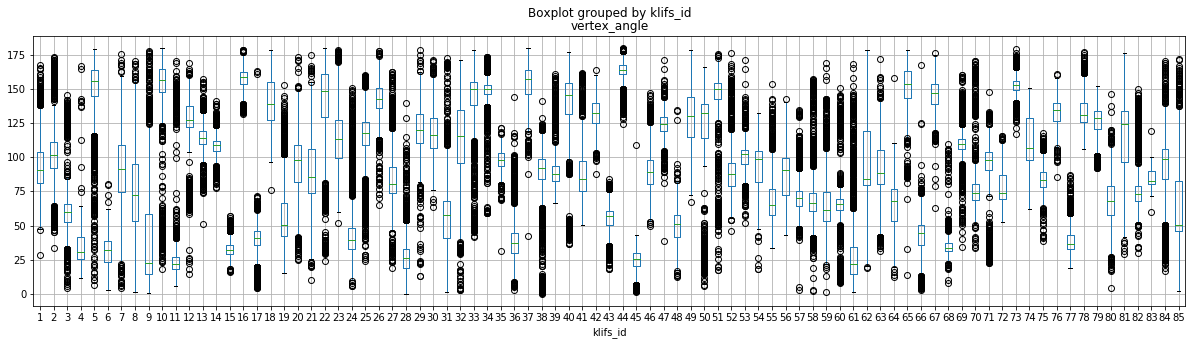

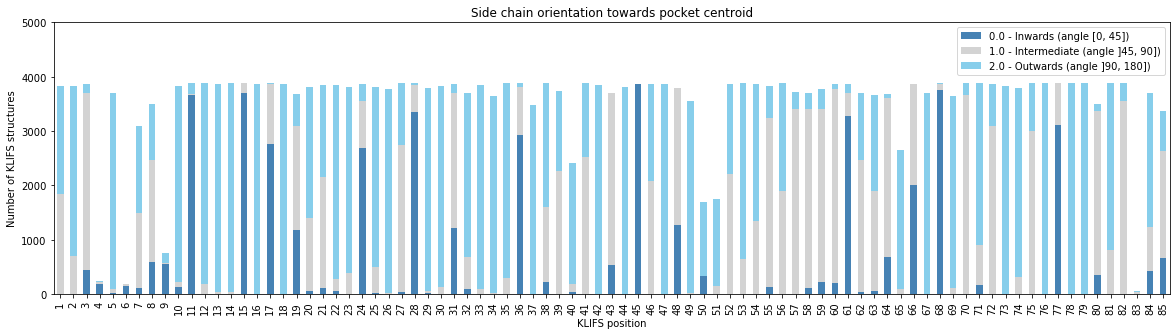

In [12]:
plot_sco_boxplot(sco_wo_pcb)
plot_sco_barplot(sco_wo_pcb)

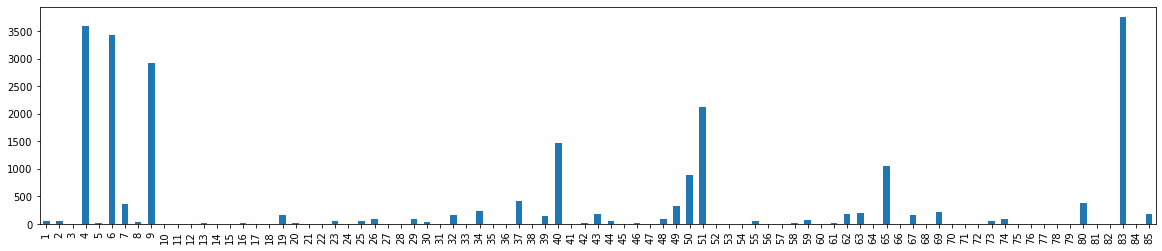

In [13]:
plot_residue_sequence_occurrency(klifs_metadata, 'G')

### Plots for SCO with pCB

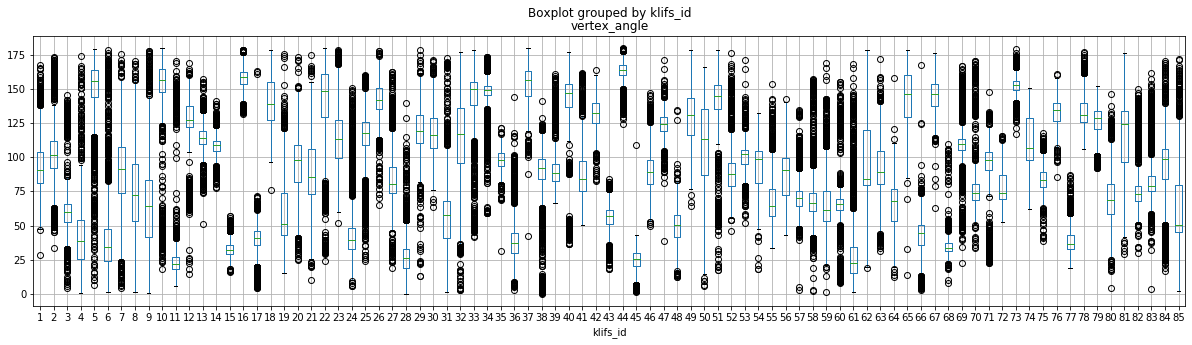

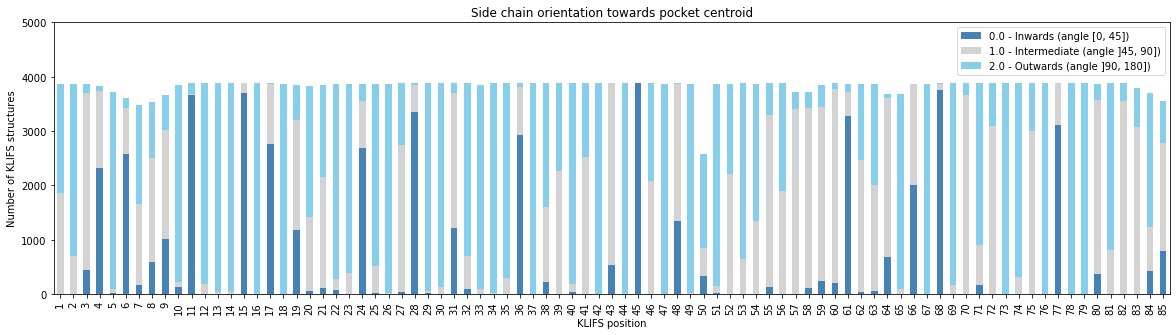

In [14]:
plot_sco_boxplot(sco)
plot_sco_barplot(sco)

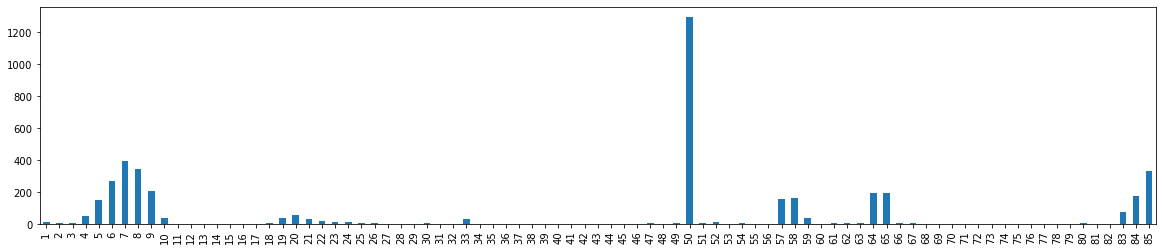

In [15]:
plot_residue_sequence_occurrency(klifs_metadata, '_')

### Exceptions

#### Without pCB

In [16]:
!less ../results/side_chain_orientation/generate_sco_wo_pcb.log | grep "GLY - None" | wc -l

6761


In [17]:
!less ../results/side_chain_orientation/generate_sco_wo_pcb.log | grep "ALA - CB atom" | wc -l

5802


In [18]:
!less ../results/side_chain_orientation/generate_sco_wo_pcb.log | grep "ALA - None" | wc -l

1


In [19]:
!less ../results/side_chain_orientation/generate_sco_wo_pcb.log | grep "Standard residue - CB" | wc -l

1029


In [20]:
!less ../results/side_chain_orientation/generate_sco_wo_pcb.log | grep "Standard residue - None" | wc -l

8


In [21]:
!less ../results/side_chain_orientation/generate_sco_wo_pcb.log | grep "Non-standard residue - centroid" | wc -l

0


In [22]:
!less ../results/side_chain_orientation/generate_sco_wo_pcb.log | grep "Non-standard residue - None" | wc -l

0


#### With pCB

##### GLY

In [23]:
!less ../results/side_chain_orientation/generate_sco.log | grep "GLY - None" 

11/13/2019 12:18:06 PM HUMAN/CHK1_3ot8_altA_chainA: SCO: Side chain centroid for residue GLY, (' ', 18, ' ') with 0 atoms is: GLY - None.
11/13/2019 12:30:28 PM HUMAN/p38a_3fc1_chainX: SCO: Side chain centroid for residue GLY, (' ', 31, ' ') with 0 atoms is: GLY - None.
11/13/2019 12:30:28 PM HUMAN/p38a_3fc1_chainX: SCO: Side chain centroid for residue GLY, (' ', 170, ' ') with 0 atoms is: GLY - None.


#### ALA

In [24]:
!less ../results/side_chain_orientation/generate_sco.log | grep "ALA - pCB" | wc -l

12


In [25]:
!less ../results/side_chain_orientation/generate_sco.log | grep "ALA - None" | wc -l

8


In [26]:
!less ../results/side_chain_orientation/generate_sco.log | grep "ALA - None"

11/13/2019 12:17:24 PM HUMAN/CDK2_2r3n_altB_chainA: SCO: Side chain centroid for residue ALA, (' ', 149, ' ') with 0 atoms is: ALA - None.
11/13/2019 12:18:06 PM HUMAN/CHK1_3ot3_altB_chainA: SCO: Side chain centroid for residue ALA, (' ', 19, ' ') with 0 atoms is: ALA - None.
11/13/2019 12:18:07 PM HUMAN/CHK1_3pa4_altB_chainA: SCO: Side chain centroid for residue ALA, (' ', 19, ' ') with 0 atoms is: ALA - None.
11/13/2019 12:18:07 PM HUMAN/CHK1_3pa5_altB_chainA: SCO: Side chain centroid for residue ALA, (' ', 19, ' ') with 0 atoms is: ALA - None.
11/13/2019 12:18:09 PM HUMAN/CHK1_4fsn_altA_chainA: SCO: Side chain centroid for residue ALA, (' ', 19, ' ') with 0 atoms is: ALA - None.
11/13/2019 12:18:23 PM HUMAN/CHK1_4jik_chainA: SCO: Side chain centroid for residue ALA, (' ', 19, ' ') with 0 atoms is: ALA - None.
11/13/2019 12:29:29 PM HUMAN/ULK3_6fdy_chainU: SCO: Side chain centroid for residue ALA, (' ', 26, ' ') with 0 atoms is: ALA - None.
11/13/2019 12:30:50 PM HUMAN/p38a_5tbe_chai

#### Other standard residues

In [27]:
!less ../results/side_chain_orientation/generate_sco.log | grep "Standard residue - CB atom" | wc -l

3490


In [28]:
!less ../results/side_chain_orientation/generate_sco.log | grep "Standard residue - pCB" | wc -l

21


In [29]:
!less ../results/side_chain_orientation/generate_sco.log | grep "Standard residue - None" | wc -l

9


In [30]:
!less ../results/side_chain_orientation/generate_sco.log | grep "Standard residue - None"

11/13/2019 12:15:21 PM HUMAN/BTK_5fbo_altB_chainA: SCO: Side chain centroid for residue SER, (' ', 543, ' ') with 0 atoms is: Standard residue - None, only 0/2 residues.
11/13/2019 12:15:36 PM HUMAN/ALK_2yjr_altB_chainA: SCO: Side chain centroid for residue MET, (' ', 1273, ' ') with 0 atoms is: Standard residue - None, only 0/3 residues.
11/13/2019 12:15:37 PM HUMAN/ALK_2yjs_chainA: SCO: Side chain centroid for residue HIS, (' ', 1124, ' ') with 0 atoms is: Standard residue - None, only 0/5 residues.
11/13/2019 12:16:30 PM HUMAN/CDK2_5fp5_chainA: SCO: Side chain centroid for residue LEU, (' ', 148, ' ') with 0 atoms is: Standard residue - None, only 0/3 residues.
11/13/2019 12:18:07 PM HUMAN/CHK1_3pa4_altB_chainA: SCO: Side chain centroid for residue TYR, (' ', 20, ' ') with 0 atoms is: Standard residue - None, only 0/6 residues.
11/13/2019 12:18:23 PM HUMAN/CHK1_4jik_chainA: SCO: Side chain centroid for residue ASN, (' ', 51, ' ') with 0 atoms is: Standard residue - None, only 0/3 re

#### Non-standard residues

In [31]:
!less ../results/side_chain_orientation/generate_sco.log | grep "Non-standard residue - centroid" | wc -l

18


### Comparison without/with pCB

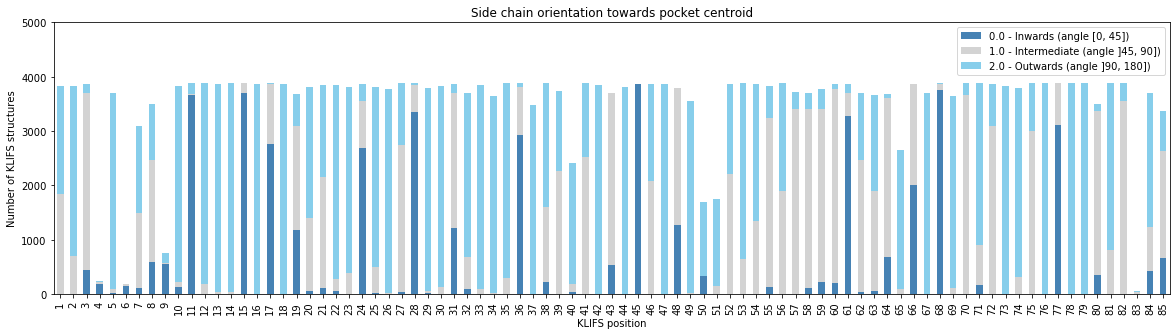

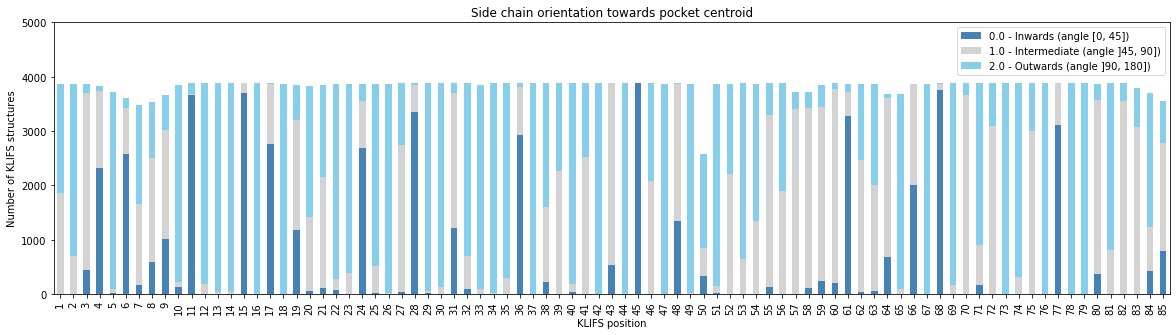

In [32]:
p_wo_pcb = plot_sco_barplot(sco_wo_pcb)
p_w_pcb = plot_sco_barplot(sco)

In [33]:
p_w_pcb.get_figure().savefig(path_to_results / 'side_chain_orientation.png', dpi=300)